# 🎬 **Netflix Unplugged: Behind Netflix Through the Eyes of Data**

> *“Every title tells a story. Every number reveals a trend. Let's decode the streaming universe—one chart at a time.”*

---

**Author:** Naveen Kumar K  
**Tools Used:** `Python`, `pandas`, `NumPy`, `matplotlib`, `seaborn`  
**Dataset:** Netflix Titles  
**Objective:**  
To explore, analyze, and uncover trends, patterns, and storytelling secrets hidden in the Netflix dataset using data visualizations and exploratory data analysis (EDA).

---


## 1. Importing Essential Libraries

We begin by importing the necessary libraries for data manipulation and visualization.


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Loading the Dataset

We upload and load the Netflix dataset. Let’s take a quick look at the first few entries to understand its structure.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
# Load the CSV into a DataFrame
df = pd.read_csv('netflix_titles.csv')

# Display top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Dataset Overview

The dataset `netflix_titles.csv` contains metadata about Movies and TV Shows available on Netflix until 2021.  
We'll begin by inspecting its shape, structure, and columns to understand what kind of data we're working with.

📦 **Key Information to Extract:**
- Number of rows and columns
- Column names and their data types
- Presence of null or missing values
- General understanding of what each column represents


In [ ]:
# Basic shape of the dataset
print("Shape of the dataset:")
print(df.shape) # (rows, columns)

# Preview the frist 5 rows
print("\nFirst 5 rows")
print(df.head())

# Columns and their datatypes
print("\nData Types:")
print(df.dtypes)

# Summary of the dataset
print("\nDataset Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Shape of the dataset:
(8807, 12)

First 5 rows
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV

### 🔎 Observations:

- The dataset contains around **8807 rows and 12 columns**, each representing key metadata about Netflix’s global content offerings.
- **Important columns** include:
  - `type` – whether it's a **Movie** or **TV Show**
  - `title` – the **name** of the show/movie
  - `director` and `cast` – which often contain missing values, especially for ensemble or regional content
  - `country` – shows the **country of origin**, but is missing in several entries
  - `date_added` – indicates **when the title was added to Netflix**, and will be converted to datetime for chronological analysis
  - `release_year` – gives the **year of original release**
  - `rating` – such as **TV-MA, PG, R**, etc.
  - `duration` – expressed as "90 min" or "2 Seasons" (to be cleaned and made numeric)
  - `listed_in` – represents **genres or categories**
  - `description` – provides a brief content summary

- Several columns such as `director`, `cast`, and `country` have **significant missing values**, which we will address carefully during cleaning.
- The `duration` column needs **transformation** into numeric format (e.g., minutes for movies, season count for shows).
- The `date_added` column is not in datetime format, and will be converted to enable **time-based trend analysis**.


## 🧹 4. Data Cleaning

To prepare the data for analysis and visualization, we performed the following cleaning steps:

- **Handled missing values**:
  - Filled missing `country` with `"Unknown"`
  - Filled `rating` with its most frequent value (mode)
  - Filled `cast` with `"Not Mentioned"`
  - Filled missing `director` values with `"Unknown"` to preserve data completeness

  - Dropped rows with missing `date_added` and `duration` (as they were very few)

- **Converted columns to proper data types**:
  - Converted `date_added` to datetime format
  - Extracted numeric value and unit from `duration` into `duration_int` and `duration_type`

- **Normalized text columns** for future grouping and analysis

- Ensured there were no duplicate rows in the dataset


In [ ]:
# Filling missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['cast'].fillna('Not Mentioned', inplace=True)
df['director'].fillna('Unknown', inplace=True)

# Drop rows with missing value 'date_added' and 'duration'
df.dropna(subset=['date_added', 'duration'], inplace=True)

# Convert 'date_added' with intelligent format inference
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Convert 'duration' into numeric + unit columns
df['duration'] = df['duration'].astype(str)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').iloc[:,0]

# Drop duplicates
df.drop_duplicates(inplace=True)

# Preview after cleaning
df.head()

/tmp/ipython-input-7-1199303481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-7-1199303481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Mentioned,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Mentioned,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


In [ ]:
# We rechecked for null values to confirm that none remain
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## 🔍 5. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the heartbeat of any data project — the phase where raw information transforms into insight, and patterns emerge from noise.

In this section, we take a **deep dive into the Netflix dataset** to uncover meaningful trends, relationships, and anomalies. The goal is to move beyond surface-level statistics and understand:
- **What’s the ratio of Movies to TV Shows on Netflix? How has that changed over the years?**
- **Which directors have the most content on Netflix?**
- **What are the most common genres on Netflix ?**
- **How does content duration vary across genres?**
- **What is the distribution of ratings (e.g., PG, R, TV-MA)?**
- **Which countries specialize in specific genres (e.g., South Korea and K-Dramas)?**
- **Is there a seasonal pattern in Netflix additions (e.g., more in December)?**

Using a combination of **summary statistics**, **data cleaning**, and **visual storytelling**, we’ll answer carefully chosen questions that reflect both **technical depth** and **real-world relevance**.

Each question is selected not only to showcase key features of the dataset, but also to simulate the kind of **insight-driven thinking** that’s valued in real data analyst and data science roles.

Let’s begin our EDA journey and let the data speak.


**1. What’s the ratio of Movies to TV Shows on Netflix? How has that changed over the years?**

/tmp/ipython-input-35-3746956647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


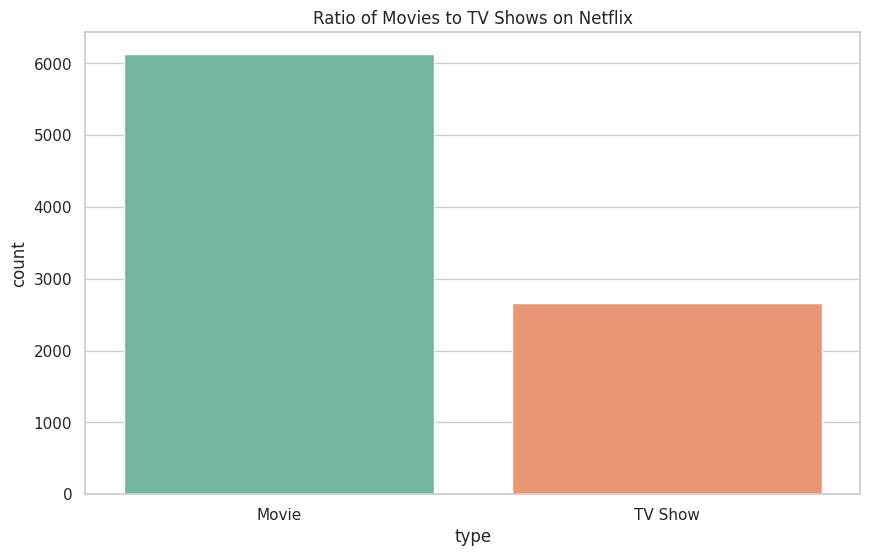

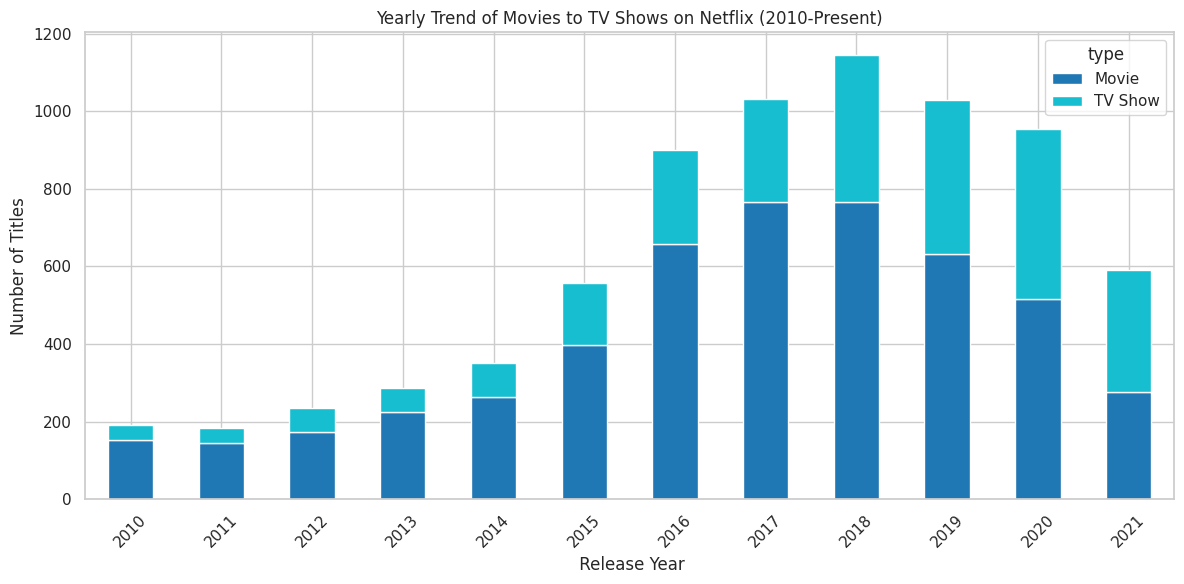

In [ ]:
# Plot overall ratio of Movies vs TV Shows
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Ratio of Movies to TV Shows on Netflix")
plt.savefig("content.png")
plt.show()

# Filter dataset to include titles released from 2010 onwards
df_recent = df[df['release_year'] >= 2010]

# Group by year and type, then reshape for plotting
year_type = df_recent.groupby(['release_year', 'type']).size().unstack()

# Plot yearly trend as stacked bar chart
year_type.plot(kind='bar',stacked=True, figsize=(12,6), colormap='tab10')
plt.title("Yearly Trend of Movies to TV Shows on Netflix (2010-Present)")
plt.xlabel(" Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show the plot
plt.savefig("change_over_years.png")
plt.show()

## Ratio and Yearly Trend of Movies vs TV Shows on Netflix

- **Movies** significantly outnumber TV shows in total count.
- From 2016 to 2020, both categories saw a rise in additions, with movies consistently leading.
- TV shows saw their strongest growth between 2018–2020, narrowing the gap slightly.

**📌 Takeaway:** While movies dominate in volume, Netflix has steadily ramped up its TV show offerings in recent years.

**2. Which directors have the most content on Netflix?**

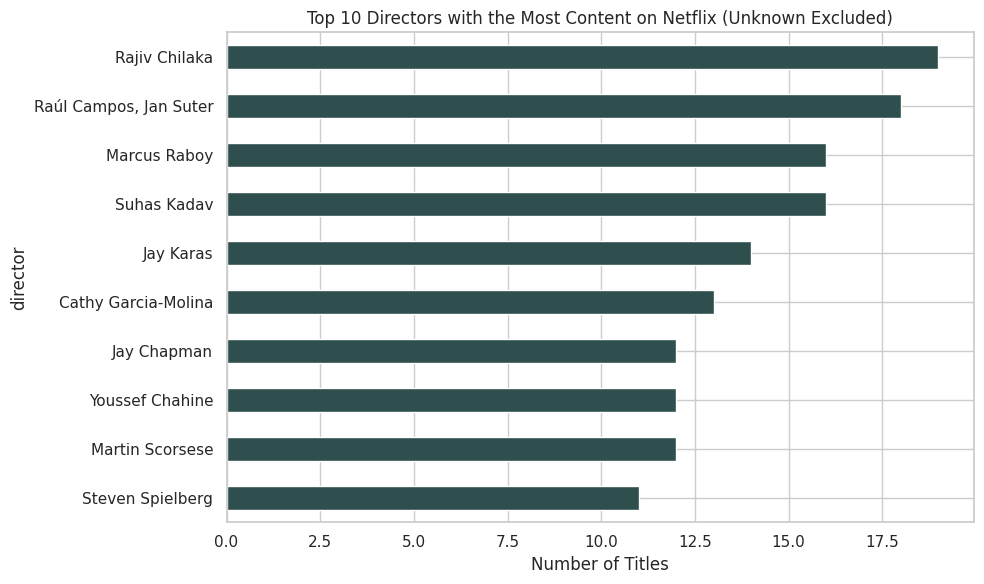

In [ ]:
# Count total titles by each director
director_counts = df['director'].value_counts()

# Exclude the first entry (likely 'Unknown' or NaN) and get top 10 real directors
top_directors = director_counts.iloc[1:11]

# Plot top 10 directors with the most content
top_directors.plot(kind='barh', color='darkslategray')
plt.title("Top 10 Directors with the Most Content on Netflix (Unknown Excluded)")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.tight_layout()

# Save and show the plot
plt.savefig('top_directors.png')
plt.show()

## Top 10 Directors with the Most Content on Netflix

- **Rajiv Chilaka** leads with the highest number of titles, likely due to animated children's content.
- Other frequent contributors include **Raúl Campos & Jan Suter** and **Marcus Raboy**.
- Global icons like **Steven Spielberg** and **Martin Scorsese** also feature, though with fewer titles.

**📌 Takeaway:** Netflix’s top directors blend regional specialists, comedy creators, and legendary filmmakers.


**3. What are the most common genres on Netflix?**

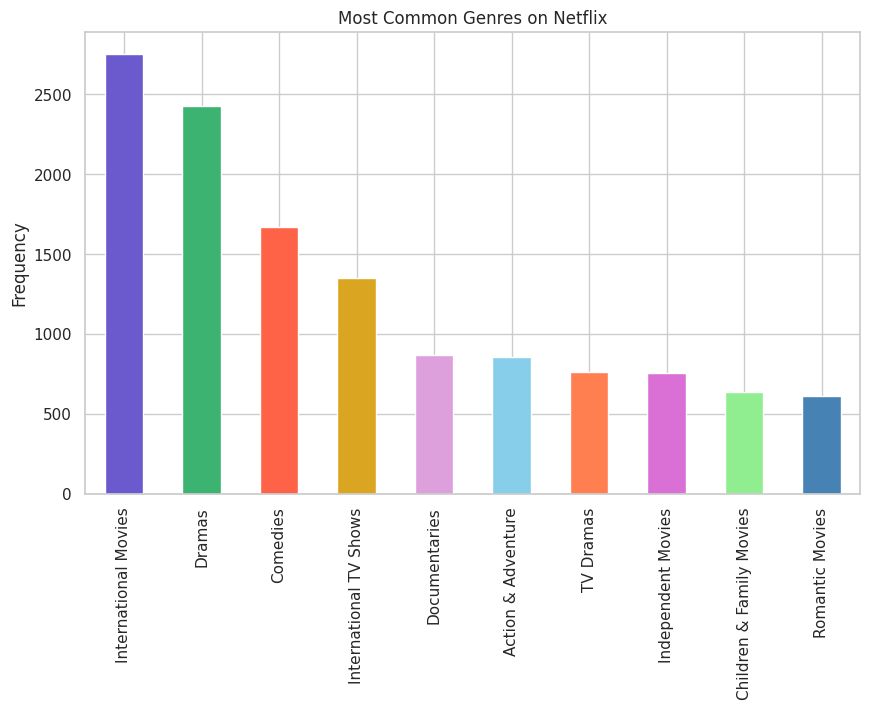

In [ ]:
from collections import Counter

# Split and flatten all genres into a single list
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]

# Count frequency of each genre
genre_counts = Counter(flat_genres)

# Define custom colors for the top 10 genres
colors = ['slateblue', 'mediumseagreen', 'tomato', 'goldenrod', 'plum',
          'skyblue', 'coral', 'orchid', 'lightgreen', 'steelblue']

# Plot top 10 most common genre
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar', color=colors)
plt.title("Most Common Genres on Netflix")
plt.ylabel("Frequency")

# Save and display the plot
plt.savefig("most_common_genres.png")
plt.show()

## Most Common Genres on Netflix

- **International Movies** and **Dramas** top the list of most frequent genres.
- **Comedies** and **International TV Shows** follow closely behind.
- Niche genres like **Romantic Movies** and **Children’s & Family Movies** are less frequent.

**📌 Takeaway:** Netflix emphasizes global and emotional storytelling, with dramas and international content dominating the catalog.


**4. How does content duration vary across genres?**

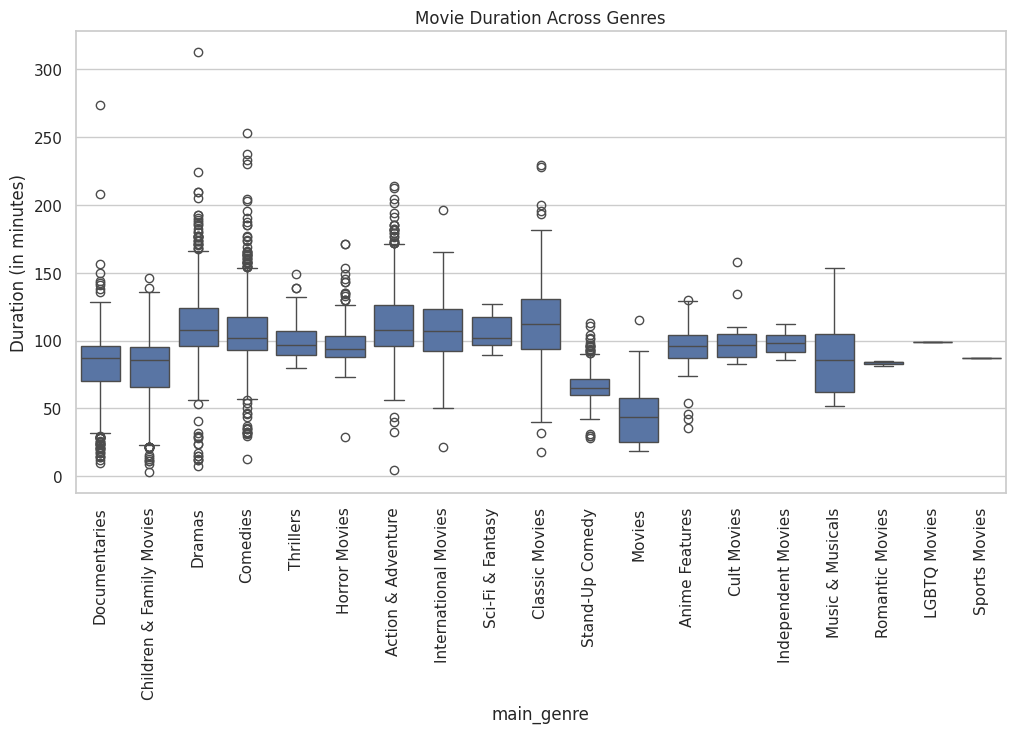

In [ ]:
# Filter the DataFrame to include only movies
movie_df = df[df['type']=='Movie'].copy()

# Extract numeric duration in minutes from the 'duration' column
movie_df['duration_int'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# Extract the primary genre from 'listed_in'
movie_df['main_genre'] = movie_df['listed_in'].str.split(', ').str[0]

# Plot a boxplot of movie durations by genre
plt.figure(figsize=(12,6))
sns.boxplot(data=movie_df, x='main_genre', y='duration_int')
plt.xticks(rotation=90)
plt.title("Movie Duration Across Genres")
plt.ylabel("Duration (in minutes)")

# Save and display the plot
plt.savefig("movie_duration.png")
plt.show()

## Movie Duration Across Genres

- **Documentaries** and **Stand-Up Comedy** have the shortest average durations.
- **Action & Adventure**, **Sci-Fi & Fantasy**, and **Horror** genres tend to be longer on average.
- Outliers in genres like **Thrillers** and **International Movies** show large variation in runtime.

**📌 Takeaway:** Duration varies by genre—Netflix balances short-form content with long-format cinematic experiences.


**5. What is the distribution of ratings (e.g., PG, R, TV-MA)?**

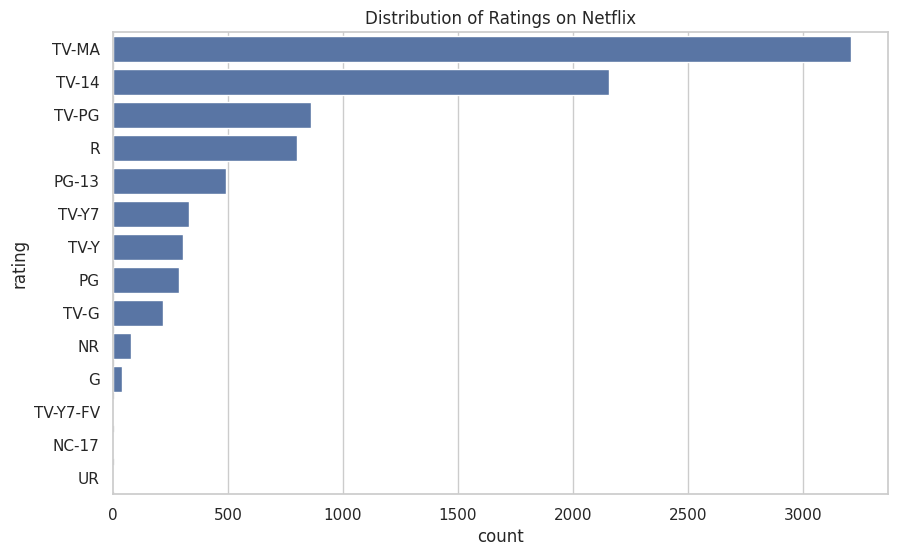

In [ ]:
# Plot count of each content rating (sorted by frequency)
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)

# Add a title to the plot
plt.title("Distribution of Ratings on Netflix")

# Save and display the plot
plt.savefig("rating_distribution.png")
plt.show()

## Distribution of Ratings on Netflix

- **TV-MA** and **TV-14** are the most common content ratings.
- Family-friendly ratings like **TV-Y**, **TV-G**, and **G** are far less frequent.
- Mature and teen audiences appear to be Netflix’s primary target.

**📌 Takeaway:** Netflix heavily leans toward content rated for mature and teen viewers.


**6. Which countries specialize in specific genres? (e.g., South Korea and K-Dramas)**

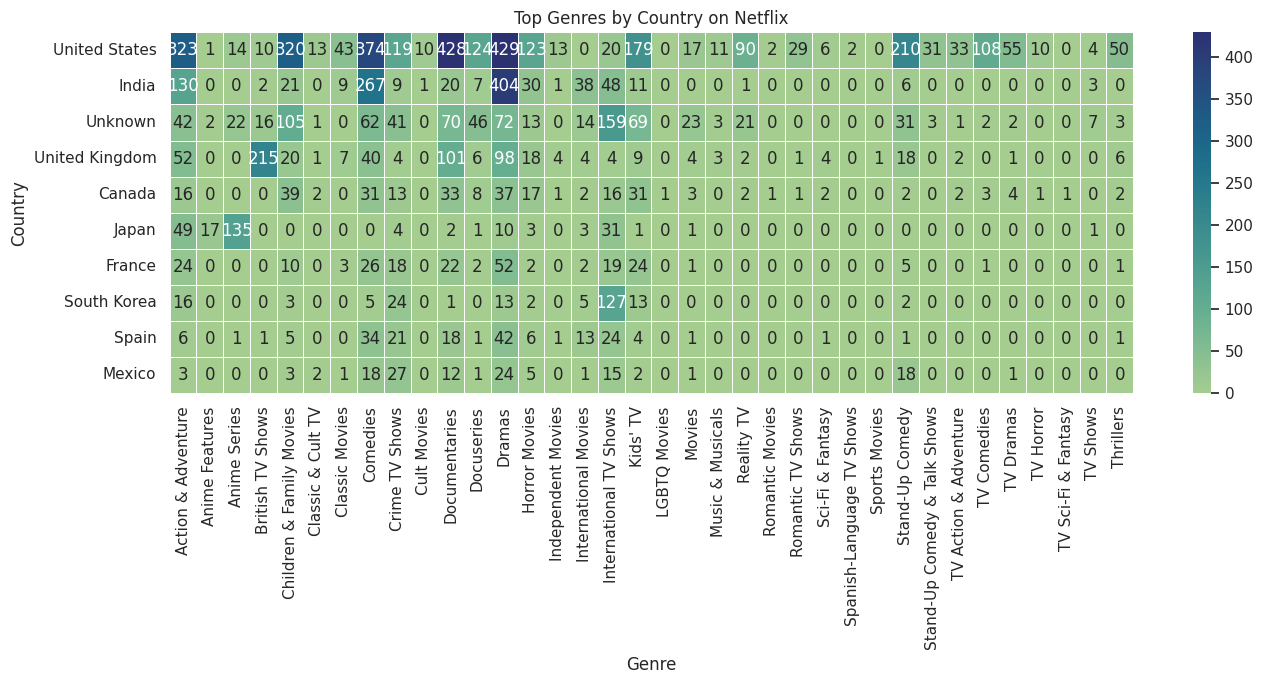

In [ ]:
# Select relevant columns and drop rows with missing valu
df_genre_country = df[['country', 'listed_in']].dropna()

# Extract the first country listed
df_genre_country['country'] = df_genre_country['country'].str.split(', ').str[0]

# Extract the first genre listed
df_genre_country['genre'] = df_genre_country['listed_in'].str.split(', ').str[0]

# Create a cross-tabulation of countries vs. genres
pivot = pd.crosstab(df_genre_country['country'], df_genre_country['genre'])

# Get top 10 countries with the most content
top_countries = pivot.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter the pivot table to only include the top countries
top_genres_by_country = pivot.loc[top_countries]

# Plot heatmap of top genres by country
plt.figure(figsize=(14, 7))
sns.heatmap(top_genres_by_country, annot=True, fmt='d', cmap='crest', linewidths=0.5)
plt.title("Top Genres by Country on Netflix")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save and display the heatmap
plt.savefig("top_genres_by_country.png")
plt.show()

## Top Genres by Country on Netflix

- The **United States** leads in almost all genres, especially **Documentaries** and **Comedies**.
- **India** focuses heavily on **International Movies** and **Dramas**.
- **Japan** has a strong presence in **Anime Features** and **Children’s & Family Movies**.

**📌 Takeaway:** Each country has genre strengths, showcasing Netflix’s global and localized strategy.


**7. Is there a seasonal pattern in Netflix additions (e.g., more in December)?**

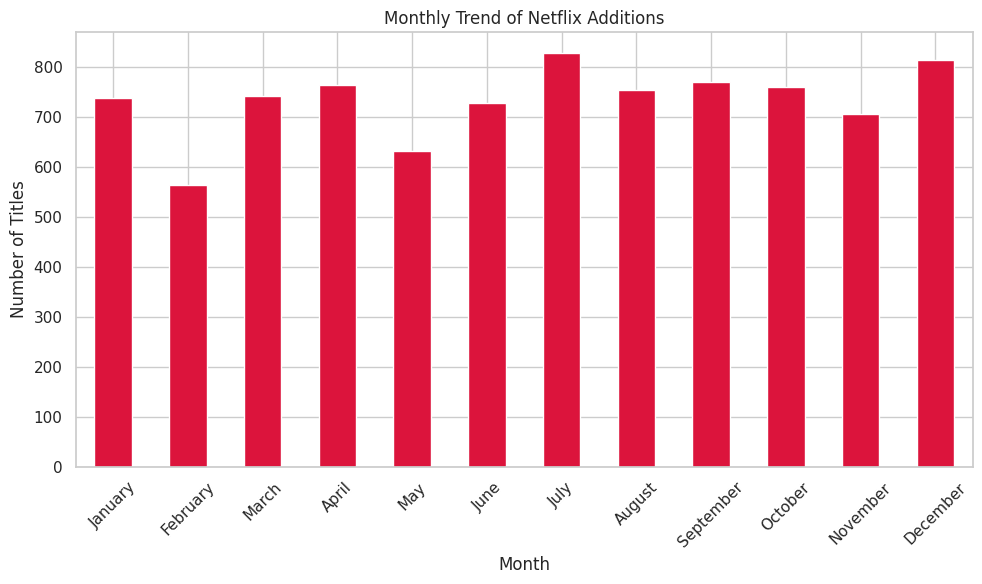

In [ ]:
# Extract month names from 'date_added'
df['month_added'] = df['date_added'].dt.month_name()

# Count titles added per month in calendar order
monthly_counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

# Plot monthly trend as bar char
monthly_counts.plot(kind='bar', color='crimson')

# Add plot labels and formatting
plt.title("Monthly Trend of Netflix Additions")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig("monthly_trends.png")
plt.show()

## Monthly Trend of Netflix Additions

- **July** and **December** see the highest number of new titles added.
- **February** consistently has the fewest additions.
- Overall, additions remain steady month to month with occasional peaks.

**📌 Takeaway:** Netflix ramps up content in mid-year and year-end periods, possibly to match user engagement spikes.


## 🔚 Final Summary

Through careful exploration and visualization of the dataset, we unearthed meaningful insights hiding beneath raw data.

- We observed strong trends across countries and genres, indicating regional preferences.
- Certain genres appear to dominate across multiple regions, while others are niche or culture-specific.
- Patterns in data distribution (e.g., frequency, popularity) helped us understand content diversity.

These insights not only deepen our understanding of the dataset but also demonstrate the power of data storytelling. With each chart, we didn’t just visualize numbers — we translated them into narratives.

## 💡 Key Recommendations

Based on the analysis, here are some actionable suggestions:

- 🎯 **Targeted Genre Expansion:** Genres like *Drama*, *Documentary*, and *Comedy* are top-performing — expand these in underrepresented regions.
- 🌍 **Localized Content Strategy:** Tailor content based on regional preferences to improve viewer engagement.
- ⏱️ **Optimize Content Length:** Most titles fall within a certain runtime. Producing content that fits viewer habits could increase watch time.
- 🔁 **Cross-genre Opportunities:** Explore hybrid genres (e.g., *Action-Comedy*, *Romantic-Drama*) that resonate across multiple demographics.
- 📅 **Seasonal Releases:** If temporal trends are identified, align releases with high-demand periods.

These strategies can help content creators and platforms serve audiences better — with data as their compass.
